In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\multiple_linear_regression.csv")

In [3]:
data

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Preprocessing

In [5]:
data = data.dropna()

In [6]:
data.shape

(200, 4)

## Splitting Data

In [7]:
output_col = "Target"

In [8]:
x = data.iloc[:, data.columns!=output_col]

In [9]:
x

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y = data.iloc[:, data.columns==output_col]

In [11]:
y

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=43)

In [18]:
x_train.shape

(140, 3)

In [17]:
x_test.shape

(60, 3)

## <font color="green"> Linear Regression</font>

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [24]:
lr_model.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [25]:
lr_model.intercept_

array([3.0777745])

In [23]:
test_predictions = lr_model.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
cost = mean_squared_error(test_predictions,y_test)

In [28]:
cost

2.241286253093347

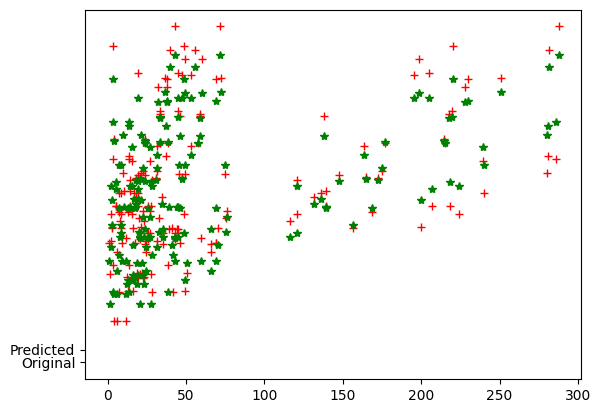

In [30]:
plt.plot(x_test,y_test,"+","Original",color="red")
plt.plot(x_test,test_predictions,"*","Predicted",color="green")

## Assumption of Linear Regression

## Homosedasticity

In [31]:
y_test

,Target
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


In [33]:
test_predictions

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [34]:
residuals = y_test - test_predictions

In [35]:
residuals

,Target
56,-2.917101
37,-0.661461
67,1.313807
79,1.240469
80,0.422008
188,-2.835263
183,2.258416
10,1.480683
128,2.633938
62,-1.131729


Text(0, 0.5, 'Residuals')

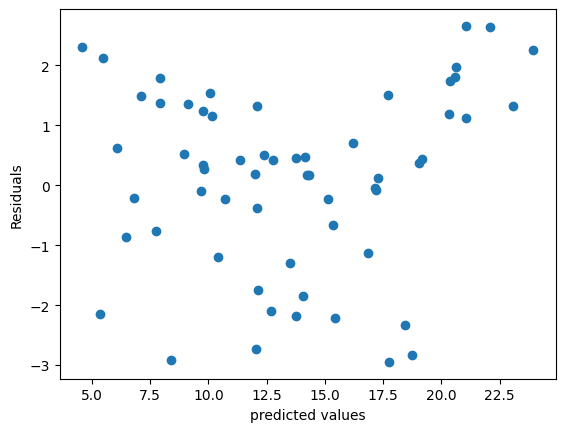

In [39]:
plt.scatter(test_predictions,residuals)
plt.xlabel("predicted values")
plt.ylabel("Residuals")

## Normality of the residuals

In [40]:
import seaborn as sns

C:\Users\kevin\AppData\Local\Temp\ipykernel_16388\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

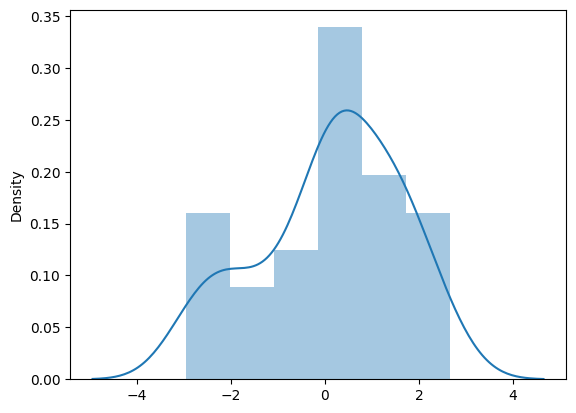

In [42]:
sns.distplot(residuals)

### Ordinary least squared method

In [43]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
import statsmodels.api as sm

In [51]:
x_with_constant = sm.add_constant(x_train)

In [52]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [53]:
model = sm.OLS(y_train,x_with_constant)

In [54]:
result = model.fit()

In [55]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [58]:
lr_model.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [59]:
lr_model.intercept_

array([3.0777745])

In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.67e-63
Time:                        08:23:18   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.000       2.291       3.865
Feature 1      0.0460      0.002     26.108      0.000       0.042       0.049
Feature 2      0.1809      0.010     17.575      0.000       0.161       0.201
Feature 3     -0.0019      0.007     -0.280      0.780      -0.016       0.012
==============================================================================
Omnibus:                       51.703   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.812
Skew:                          -1.502   Prob(JB):                     3.93e-29
Kurtosis:                       6.661   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Feature 3 has p-value greater than 0.05 and the null hypothesis is accepted
and feature 3 has weak relation with our target